# Week 2 - Nearest centroid classifier

## Classification Problem

This week, we will focus on a **classification problem**. As mentioned earlier, classification is a task where the model predicts the class label $y$ for a given feature vector $x$. 

The task will be to predict whether a given patient has breast cancer or not.

We will use the **Wisconsin Diagnostic Breast Cancer (WDBC, 1993)** dataset from the UCI Machine Learning Repository. The dataset consists of 569 samples from patients, with 357 benign and 212 malignant cases. Each sample is described by 30 features extracted from fine needle aspirate slides. These features were obtained using image processing algorithms.


## Nearest Centroid Classifier

In the following exercise, we will use the **Nearest Centroid Classifier**, which is a very simple algorithm.

### Training the Algorithm
Training the algorithm involves calculating the centroid for each class. The centroid is the mean of the feature vectors for each class, and it can be calculated using the formula:

$$
\mathbf{c}_k = \frac{1}{N_k} \sum_{i=1}^{N_k} \mathbf{x}_i \quad \text{for class} \ k
$$

Where:
- $\mathbf{c}_k$ is the centroid for class $k$
- $N_k$ is the number of samples in class $k$
- $\mathbf{x}_i$ is the feature vector of the $i$-th sample in class $k$

### Prediction
Prediction involves assigning the class to the observation $\mathbf{x}$ by measuring the distance between the observation and the centroids. The class is assigned to the centroid that is closest to the observation. The prediction is made using the formula:

$$
\hat{y} = \arg\min_k \, \|\mathbf{x} - \mathbf{c}_k\|
$$

Where:
- $\hat{y}$ is the predicted class label
- $\mathbf{x}$ is the feature vector of the observation
- $\mathbf{c}_k$ is the centroid of class $k$
- $\|\mathbf{x} - \mathbf{c}_k\|$ is the distance between the observation and the centroid (usually Euclidean distance)

### Notes
- The algorithm does not assign a probability of belonging to any class, only the class label based on the closest centroid.


In [1]:
import numpy as np
from numpy.linalg import norm    
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


## Implementing the Nearest Centroid Classifier

We will implement the **Nearest Centroid Classifier** with two methods: 

1. `fit()` – This method trains the model by calculating the centroid for each class.
2. `predict()` – This method makes predictions based on the trained centroids.

**Note:** Unlike linear regression, the Nearest Centroid Classifier does not involve minimizing a loss function. Instead, it calculates the centroid (mean of the feature vectors) for each class and assigns class labels based on the nearest centroid to the input observation.


In [2]:


class NearestCentroidClassifier:
    def __init__(self):
        self.centroids = None
        self.classes_ = None
        
    
    def fit(self, X, y):
        """
        Fit the model using X as training data and y as target values.
        :param X: array-like, shape (n_samples, n_features) Training data.
        :param y: array-like, shape (n_samples,) Target values.
        """
        self.classes_ = np.unique(y)
        self.centroids = [ np.mean(X[y==class_], axis=0) for class_ in self.classes_]

        
    
    def predict(self, X):
        """
        Perform classification on samples in X.
        :param X: array-like, shape (n_samples, n_features) Input data.
        :return: array, shape (n_samples,) Predicted class label per sample.
        """
        differences_cent_0 = norm(X - self.centroids[0], axis=1)
        differences_cent_1 = norm(X - self.centroids[1], axis=1)
        output = np.where(differences_cent_1<differences_cent_0, self.classes_[1], self.classes_[0])
        return output



In [ ]:
## Loading the dataset and splitting it into training and test sets

Let's load the dataset and split it into training and test sets. We will use 80% of the data for training and 20% for testing.

In [7]:

data = pd.read_csv('../datasets/breast_cancer_data/data_processed.csv')
print(data.shape)
# y includes our labels and x includes our features
y = data.diagnosis      # M or B 
list = ['diagnosis']
x = data.drop(list,axis = 1 )


x["bias"] = np.ones(x.shape[0])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



(569, 17)


## Training the classifier and evaluating its performance

We will train the classifier using the training set and then evaluate its performance on the test set.

In [ ]:


# Create and train the Nearest Centroid Classifier
classifier = NearestCentroidClassifier()
classifier.fit(x_train.values,y_train.values)
# Predict the classes for the test data
y_pred = classifier.predict(x_test.values)

# Calculate and print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

In [8]:
x_train.shape

(455, 17)

## Let's look at the data and centroid

As the data has 17 features, it is not possible to visualize directly. To overcome this, we will project the data into a 2-dimensional space. We will use the **Principal Component Analysis (PCA)** algorithm for this dimensionality reduction.

**Note:** The PCA algorithm will be covered in more detail in the upcoming weeks,

/home/arek/miniconda3/envs/math4ml/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/home/arek/miniconda3/envs/math4ml/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


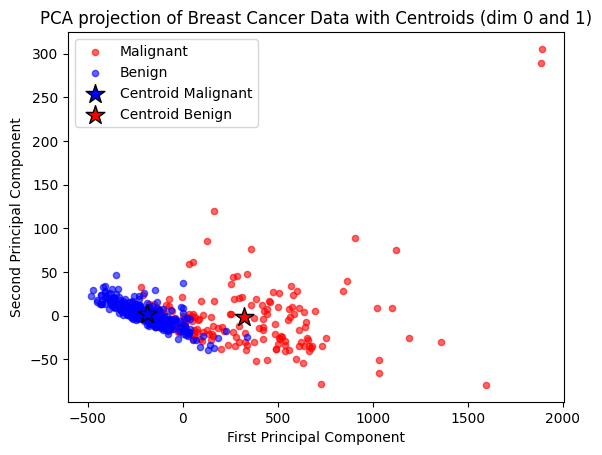

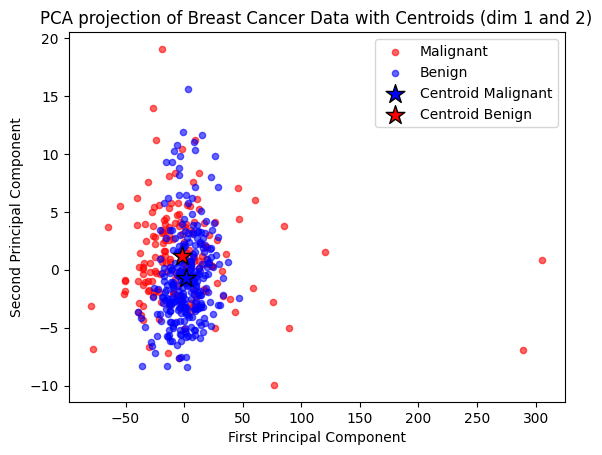

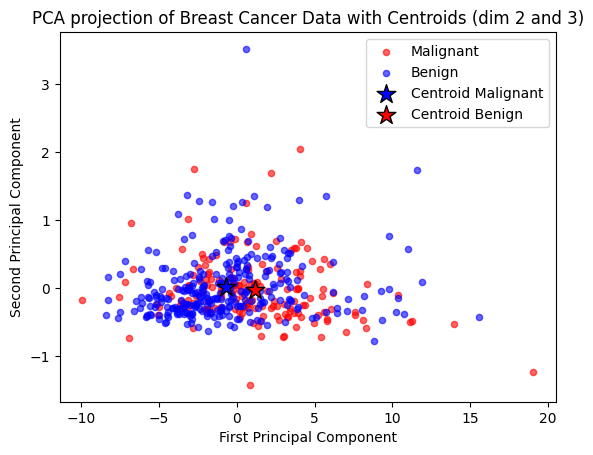

In [12]:
# import pca from sklearn
from sklearn.decomposition import PCA

# Create a PCA object
pca = PCA(n_components=4)
# Fit PCA on training data and transform both training and test data
X_train_pca = pca.fit_transform(x_train)
centroid_pca = [ pca.transform([centroid]) for centroid in classifier.centroids]
# Set plot style parameters
plt.title('PCA projection of Breast Cancer Data with Centroids (dim 0 and 1)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.scatter(X_train_pca[y_train == 'M'][:, 0], X_train_pca[y_train == 'M'][:, 1], c='red', s=20, alpha=0.6, label='Malignant')
plt.scatter(X_train_pca[y_train == 'B'][:, 0], X_train_pca[y_train == 'B'][:, 1], c='blue', s=20, alpha=0.6, label='Benign')
plt.scatter(centroid_pca[0][:, 0], centroid_pca[0][:, 1], c='blue', s=200, marker='*', label='Centroid Malignant', edgecolors='black')
plt.scatter(centroid_pca[1][:, 0], centroid_pca[1][:, 1], c='red', s=200, marker='*', label='Centroid Benign', edgecolors='black')
plt.legend()


plt.figure()
plt.title('PCA projection of Breast Cancer Data with Centroids (dim 1 and 2)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.scatter(X_train_pca[y_train == 'M'][:, 1], X_train_pca[y_train == 'M'][:, 2], c='red', s=20, alpha=0.6, label='Malignant')
plt.scatter(X_train_pca[y_train == 'B'][:, 1], X_train_pca[y_train == 'B'][:, 2], c='blue', s=20, alpha=0.6, label='Benign')
plt.scatter(centroid_pca[0][:, 1], centroid_pca[0][:, 2], c='blue', s=200, marker='*', label='Centroid Malignant', edgecolors='black')
plt.scatter(centroid_pca[1][:, 1], centroid_pca[1][:, 2], c='red', s=200, marker='*', label='Centroid Benign', edgecolors='black')
plt.legend()



plt.figure()
plt.title('PCA projection of Breast Cancer Data with Centroids (dim 2 and 3)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.scatter(X_train_pca[y_train == 'M'][:, 2], X_train_pca[y_train == 'M'][:, 3], c='red', s=20, alpha=0.6, label='Malignant')
plt.scatter(X_train_pca[y_train == 'B'][:, 2], X_train_pca[y_train == 'B'][:, 3], c='blue', s=20, alpha=0.6, label='Benign')
plt.scatter(centroid_pca[0][:, 2], centroid_pca[0][:, 3], c='blue', s=200, marker='*', label='Centroid Malignant', edgecolors='black')
plt.scatter(centroid_pca[1][:, 2], centroid_pca[1][:, 3], c='red', s=200, marker='*', label='Centroid Benign', edgecolors='black')
plt.legend()